In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ikanhias/Ikan/val/Guppy/38.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/33.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/IMG_20200519_213205.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/2.jpg
/kaggle/input/ikanhias/Ikan/val/Guppy/IMG_20200519_213028.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000105.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000054.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000008.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000125.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000102.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000064.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000114.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000081.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000130.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000051.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000108.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000013.jpg
/kaggle/input/ikanhias/Ikan/val/Sapusapu/00000044.jpg
/kaggle/input/ikanhias/Ikan/val/Manfish/

## Import Library

In [2]:
import os
import logging
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from efficientnet.keras import preprocess_input
from keras.models import load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Layer, ReLU, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Add, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Input, AveragePooling2D, ReLU, AlphaDropout, Conv2D, GlobalAveragePooling2D, Dense, Add, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3, VGG16, MobileNetV2, ResNet50V2
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

### Load Data

In [3]:
training_dir = "/kaggle/input/ikanhias/Ikan/train"
validation_dir = "/kaggle/input/ikanhias/Ikan/val"
testing_dir = "/kaggle/input/ikanhias/Ikan/test"

### chek class dan set size

In [4]:
img_rows, img_cols = 224, 224
channel_depth = 3
input_shape = (img_rows,img_cols,channel_depth)
model_input = Input(shape=input_shape)
num_classes = 11

## Transfer Learning DenseNet121

In [5]:
def my_model1(model_input):
    densenet = DenseNet121(weights='imagenet', include_top=False, input_tensor=model_input)
    for layer in densenet.layers:layer.trainable = False
    # our layers - you can add more if you want
    y = GlobalAveragePooling2D()(densenet.output)
    y = Dense(512, activation='relu', use_bias=True)(y)
    y = Dropout(0.5)(y)
    prediction = Dense(num_classes,activation='softmax')(y)
    model = Model(inputs=densenet.input, outputs=prediction)
    # tell the model what cost and optimization method to use
    return model

In [6]:
model1 = my_model1(model_input)


29084464/29084464 [==============================] - 0s 0us/step


## Tf learning InceptionV3

In [7]:
def my_model2(model_input):
    InceptionV3_builder = InceptionV3(
        weights='imagenet', 
        include_top=False, 
        input_tensor = model_input
    )

#FINE-TUNING
    for layer in InceptionV3_builder.layers:
        layer.trainable = False
    for BatchNormalization in InceptionV3_builder.layers:
        BatchNormalization.trainable = True
    x = InceptionV3_builder.layers[-1].output    
    x = GlobalAveragePooling2D(name='GAP-inceptionv3')(x)
    x = Dropout(0.5, name='Droput-inceptionv3')(x)
    predictions = Dense(num_classes, activation='softmax', name='Softmax-inceptionv3')(x)
    model = Model(inputs=InceptionV3_builder.input, outputs=predictions, name='inceptionv3')
    return model

In [8]:
model2 = my_model2(model_input)

87910968/87910968 [==============================] - 1s 0us/step


## Tf Learning VGG16

In [9]:
def my_model3(model_input):
    densenet = VGG16(weights='imagenet', include_top=False, input_tensor=model_input)
    for layer in densenet.layers:layer.trainable = False
    # our layers - you can add more if you want
    y = GlobalAveragePooling2D()(densenet.output)
    y = Dense(512, activation='relu', use_bias=True)(y)
    y = Dropout(0.5)(y)
    prediction = Dense(num_classes,activation='softmax')(y)
    model = Model(inputs=densenet.input, outputs=prediction)
    # tell the model what cost and optimization method to use
    return model

In [10]:
model3 = my_model3(model_input)

58889256/58889256 [==============================] - 0s 0us/step


In [11]:
models = [model1, model2, model3]

In [12]:
[m.layers[0] for m in models]

In [13]:
outputs = [m.output for m in models]
y = tf.keras.layers.Average()(outputs)
TDCNN = Model(model_input, y, name='TDCNN')

## Preprocessing Using Imagedatagenerator

In [14]:
IMG_SIZE = (224,224)

def ImgDataGen(file_path, f=False):
    file_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    data_set = file_datagen.flow_from_directory(file_path,
                                                target_size = IMG_SIZE,
                                                batch_size = 16,
                                                class_mode = 'categorical',
                                                shuffle = f)
    return data_set

In [15]:
training_set, val_set, test_set = ImgDataGen(training_dir,f=True), ImgDataGen(validation_dir), ImgDataGen(testing_dir) 

Found 956 images belonging to 11 classes.
Found 116 images belonging to 11 classes.
Found 129 images belonging to 11 classes.


In [16]:
nb_train_samples = len(training_set.filenames)
nb_validation_samples = len(val_set.filenames)
nb_test_samples = len(test_set.filenames)
num_classes= len(training_set.class_indices)
labels = [i for i in training_set.class_indices]
print(labels)


['Cupang', 'Discus', 'Guppy', 'Lemonfish', 'Lohan', 'Manfish', 'Maskoki', 'Molly', 'NeonTetra', 'Sapusapu', 'Zebra']


### Latih Model

In [17]:
#MODEL COMPILATION WITH HYPER-PARAMETERS, LOSS FUNCTIONS AND TRAINING!
import time

batch_size = 16
# Learning_rate = 0.001
epochs = 30

start_time = time.time()

optimizer = Adam(learning_rate=0.0001)

TDCNN.compile(
    optimizer=optimizer, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
) 

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy', 
    factor=0.5, 
    patience=2,                          
    verbose=1, 
    mode='max', 
    min_lr=0.000001
)

callbacks = [reduce_lr]

history = TDCNN.fit(
    training_set,
    epochs=epochs, 
    steps_per_epoch=nb_train_samples // batch_size,
    validation_data=val_set,
    callbacks=callbacks, 
    validation_steps=nb_validation_samples // batch_size, 
    verbose=1
)

elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

Epoch 1/30
59/59 [==============================] - 92s 569ms/step - loss: 1.9414 - accuracy: 0.3777 - val_loss: 1.2834 - val_accuracy: 0.7679 - lr: 1.0000e-04
Epoch 2/30
59/59 [==============================] - 14s 243ms/step - loss: 1.1506 - accuracy: 0.8085 - val_loss: 1.0579 - val_accuracy: 0.8482 - lr: 1.0000e-04
Epoch 3/30
59/59 [==============================] - 16s 273ms/step - loss: 0.8943 - accuracy: 0.9074 - val_loss: 0.9667 - val_accuracy: 0.8571 - lr: 1.0000e-04
Epoch 4/30
59/59 [==============================] - 15s 254ms/step - loss: 0.8033 - accuracy: 0.9521 - val_loss: 0.9097 - val_accuracy: 0.8393 - lr: 1.0000e-04
Epoch 5/30
59/59 [==============================] - ETA: 0s - loss: 0.7187 - accuracy: 0.9670
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
59/59 [==============================] - 15s 251ms/step - loss: 0.7187 - accuracy: 0.9670 - val_loss: 0.8733 - val_accuracy: 0.8393 - lr: 1.0000e-04
Epoch 6/30
59/59 [=======================

'00:10:17'

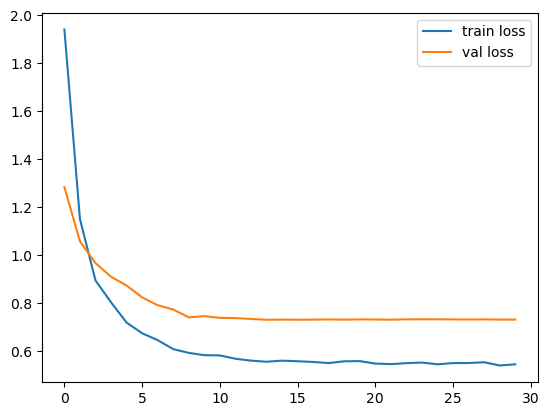

In [18]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()


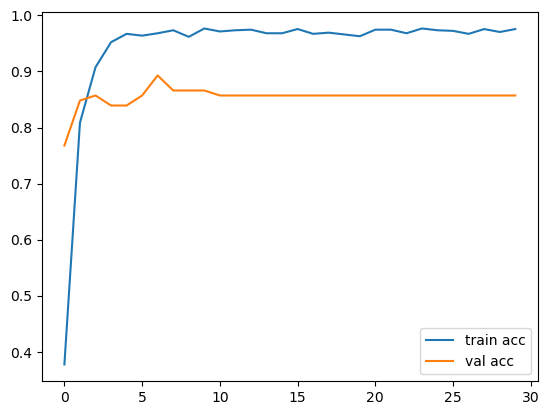

In [19]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('vgg-acc-rps-1.png')
plt.show()

9/9 [==============================] - 5s 186ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.73      0.84        22
           2       0.67      1.00      0.80         4
           3       0.73      0.89      0.80         9
           4       0.20      1.00      0.33         1
           5       0.90      0.90      0.90        10
           6       0.83      0.94      0.88        16
           7       1.00      0.88      0.94        17
           8       0.82      0.82      0.82        11
           9       1.00      0.82      0.90        17
          10       0.83      0.83      0.83        12

    accuracy                           0.86       129
   macro avg       0.81      0.89      0.82       129
weighted avg       0.90      0.86      0.87       129



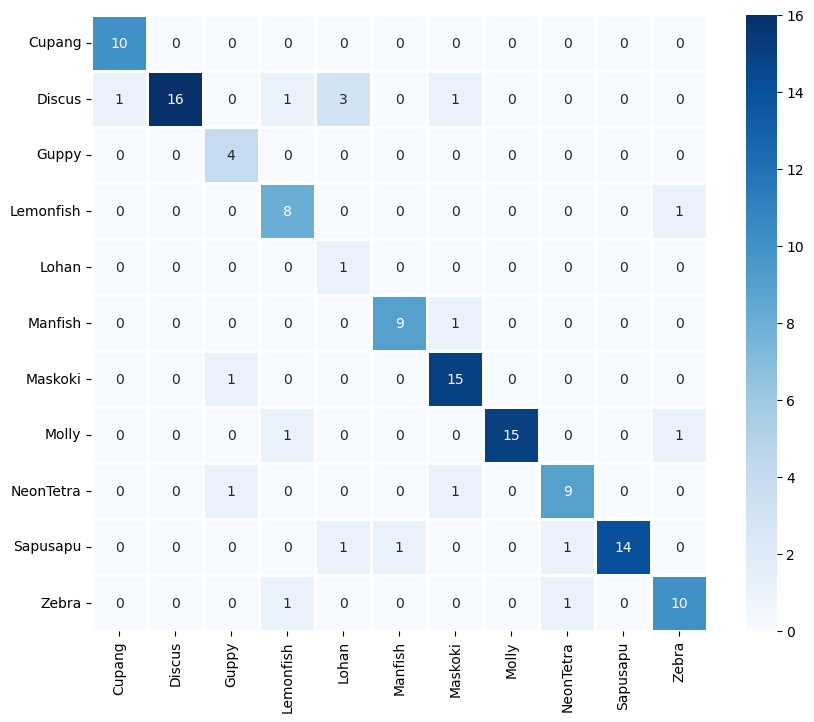

In [20]:
TDCNN.evaluate(test_set,batch_size=32)
y_pred=TDCNN.predict(test_set)
y_pred=np.argmax(y_pred,axis=1)
accuracy_score(y_pred,test_set.classes)
print(classification_report(y_pred,test_set.classes))

import seaborn as sns

# confusion_matrix
index = labels
columns = labels  
cm = confusion_matrix(y_pred, test_set.classes)
cm_df = pd.DataFrame(cm,columns,index)                      
fig = plt.figure(figsize=(10,8),dpi=100)  
fig = sns.heatmap(cm_df,cmap='Blues',annot=True, fmt="d",linewidths=1, square=True)

In [25]:
image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'TDCNN'+'.svg'

figure = fig.get_figure()  
figure.savefig(image_name, format=image_format, dpi=1200) 

## Save Model

In [23]:
file_model = "weights/TDCNN_1.h5"
tf.keras.models.save_model(TDCNN,file_model)

## Try Just Using mobilenet

In [33]:
from tensorflow.keras.applications import ResNet50V2, MobileNetV2
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def ImgDataGen(file_path, f=False):
    file_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    data_set = file_datagen.flow_from_directory(file_path,
                                                batch_size = 32,
                                                class_mode = 'categorical',
#                                                 color_mode = 'rgb',
                                               shuffle = False)
    return data_set

In [34]:
training_set, val_set, test_set = ImgDataGen(training_dir,f=True), ImgDataGen(validation_dir), ImgDataGen(testing_dir) 

Found 956 images belonging to 11 classes.
Found 116 images belonging to 11 classes.
Found 129 images belonging to 11 classes.


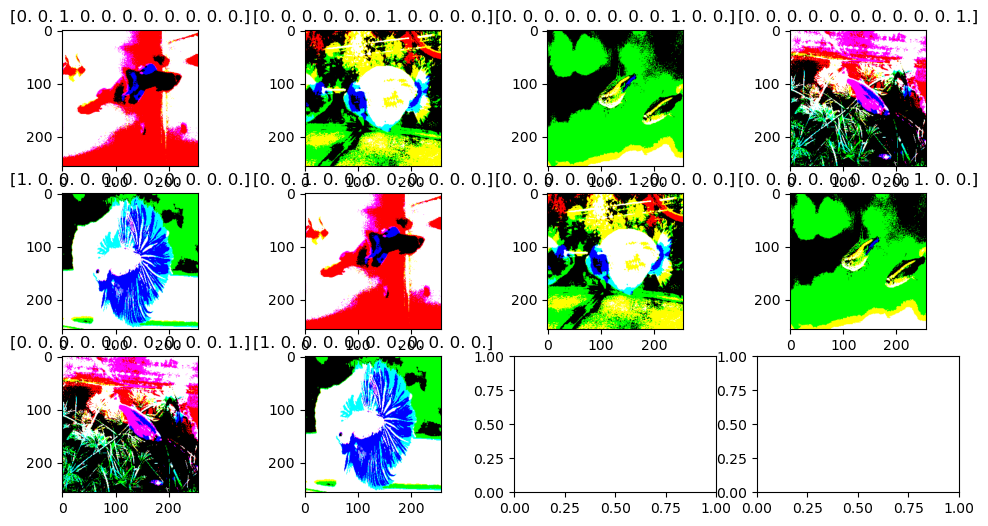

In [41]:
fit, ax= plt.subplots(nrows=3, ncols=4, figsize=(12,6))
ax=ax.flatten()
j=0
for _ in range(10):
    img, label = test_set.next()
    #print(img.shape)   #  (1,256,256,3)
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    #plt.show()
    j=j+1

In [42]:
test_set[0][0].shape


(32, 256, 256, 3)

In [43]:
image_shape=(256,256,3)


In [44]:
training_set.class_indices

{'Cupang': 0,
 'Discus': 1,
 'Guppy': 2,
 'Lemonfish': 3,
 'Lohan': 4,
 'Manfish': 5,
 'Maskoki': 6,
 'Molly': 7,
 'NeonTetra': 8,
 'Sapusapu': 9,
 'Zebra': 10}

In [45]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
pre_trained= MobileNetV2(include_top=False, pooling='avg', input_shape=image_shape)

#for layers in pre_trained.layers:
#    layers.trainable=False
pre_trained.trainable=False
num_classes = 11
inp_model = pre_trained.input
#x=Flatten()(pre_trained.output)
x=Dense(128, activation='relu')(pre_trained.output)
x=Dropout(0.5)(x)
x=Dense(128, activation='relu')(x)
output=Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inp_model, outputs=output)




model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)

results = model.fit(training_set,epochs=20,
                              validation_data=val_set,
                                callbacks=[early_stop])

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 17s 459ms/step - loss: 2.7739 - accuracy: 0.0638 - val_loss: 2.3183 - val_accuracy: 0.2328
Epoch 2/20
30/30 [==============================] - 12s 389ms/step - loss: 2.3627 - accuracy: 0.1381 - val_loss: 2.3025 - val_accuracy: 0.2672
Epoch 3/20
30/30 [==============================] - 12s 394ms/step - loss: 2.3390 - accuracy: 0.1663 - val_loss: 2.2256 - val_accuracy: 0.2931
Epoch 4/20
30/30 [==============================] - 12s 376ms/step - loss: 2.2644 - accuracy: 0.1893 - val_loss: 2.2008 - val_accuracy: 0.2759
Epoch 5/20
30/30 [==============================] - 11s 376ms/step - loss: 2.2625 - accuracy: 0.2061 - val_loss: 2.1642 - val_accuracy: 0.3276
Epoch 6/20
30/30 [==============================] - 12s 400ms/step - loss: 2.2669 - accuracy: 0.2249 - val_loss: 2.0986 - val_accuracy: 0.3017
Epoch 7/20
30/30 [==============================] - 13s 428ms/step - loss: 2.11